# Accessing Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_palette('Set2')

In [3]:
data = pd.read_csv('../train.csv')
data.shape

(5282, 20)

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.shape

(5282, 20)

In [6]:
data.sample(15)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3364,64,84.30,5289.05,Male,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,No,One year,Yes,Credit card (automatic),0
1012,27,75.50,1893.95,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
4057,61,19.40,1182.55,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,1
1115,55,88.80,4805.3,Female,1,Yes,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0
2525,27,55.45,1477.65,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),0
1521,3,79.65,251.75,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),1
2218,47,106.40,5127.95,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
3414,63,19.25,1237.65,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
3715,72,116.75,8277.05,Female,1,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
4138,3,88.30,273.75,Female,1,Yes,Yes,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,1


In [7]:
# Очистка и приведение к числовому типу
data['TotalSpent'] = data['TotalSpent'].str.strip()
data['TotalSpent'] = data['TotalSpent'].replace('', np.nan)
data['TotalSpent'] = data['TotalSpent'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [8]:
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5273.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2291.390461,0.159409,0.262022
std,24.550326,30.176464,2269.014233,0.366092,0.439776
min,0.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.462500,401.100000,0.000000,0.000000
50%,29.000000,70.400000,1410.250000,0.000000,0.000000
75%,55.000000,90.050000,3807.350000,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


In [9]:
# Проверка на NaN
print(data.isna().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


In [10]:
filt1 = data['TotalSpent'].isna() == True
data[filt1].head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0


In [11]:
# Меняем нули в ClientPeriod на позитивные значения (понадобится в дальнейшем)
data_client_edit = data.copy()
data_client_edit['ClientPeriod'].replace(0, 0.5, inplace=True)
data_client_edit[filt1].head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0.5,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0.5,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0.5,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0.5,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0.5,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0


In [12]:
# Заполняем NaNы
data_no_nans = data_client_edit.copy()
data_no_nans['TotalSpent'] = data['TotalSpent'].fillna(data['MonthlySpending'])

In [13]:
# Убедимся, что пропусков нет
print(data_no_nans.isna().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


In [14]:
# Проверка на дубликаты строк
data_no_nans.duplicated().sum()

14

In [15]:
# Удаляем дубликаты
data_no_dups = data_no_nans.drop_duplicates()
data_no_dups.duplicated().sum()

0

In [16]:
df = data_no_dups.copy()

# EDA

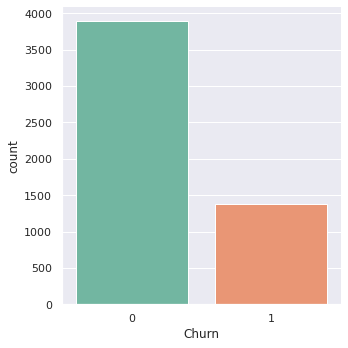

In [17]:
# Распределение таргет-переменной
sns.catplot(data=df, x=target_col, kind='count');

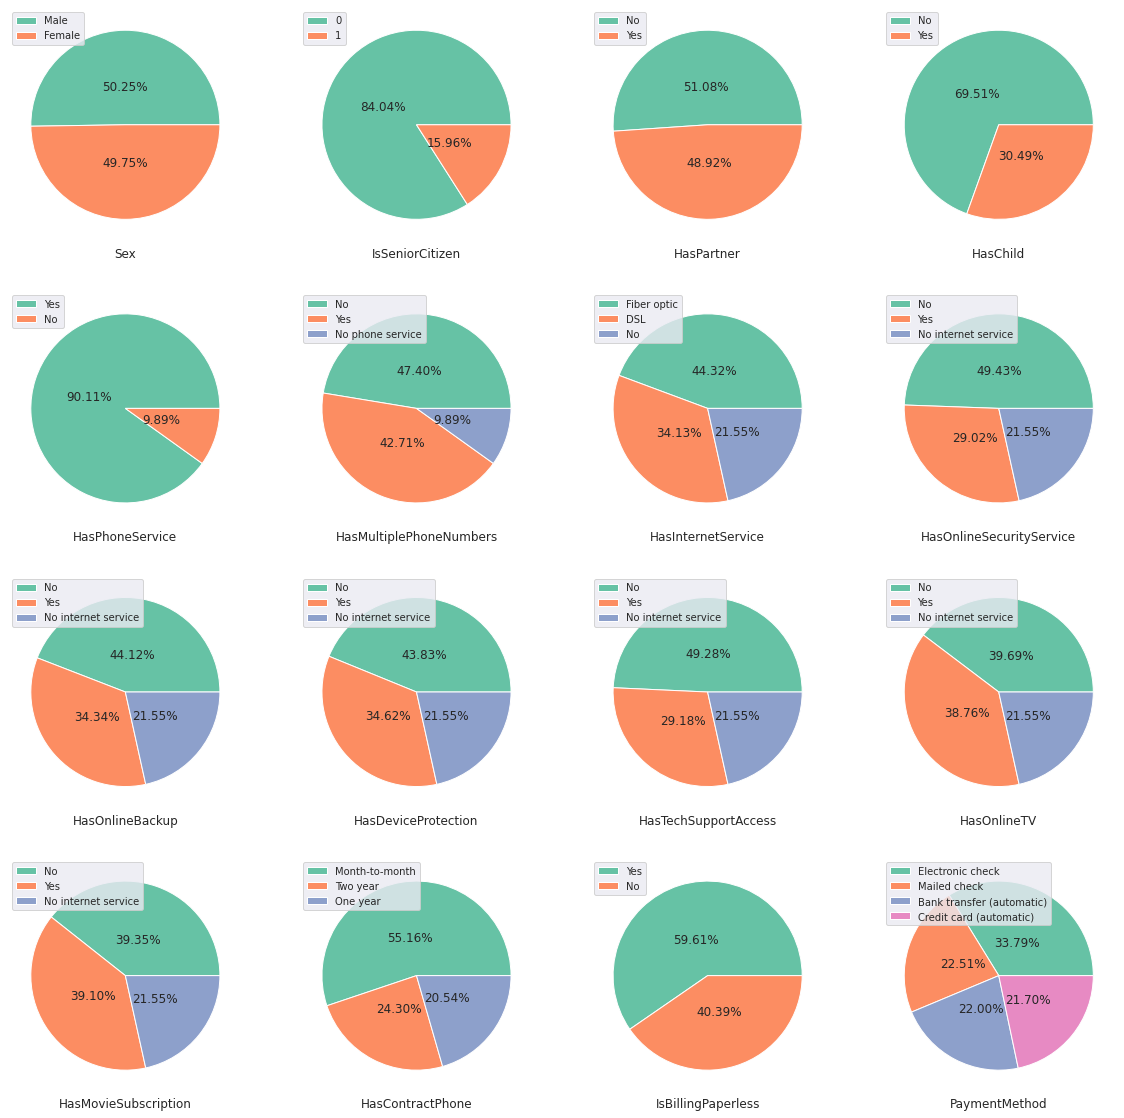

In [137]:
# Строим
fig, axs = plt.subplots(4, 4, constrained_layout=False, figsize=(20, 20))
idx = 0
for ax_id, ax in enumerate(axs):
    for sub_id, sub in enumerate(ax):
        df[cat_cols[idx]].value_counts().plot(
            kind='pie',
            ax=axs[ax_id, sub_id], 
            autopct='%1.2f%%',
            labeldistance=None,
            pctdistance=0.4
        )
        axs[ax_id, sub_id].legend(loc=2, fontsize='small')
        axs[ax_id, sub_id].set_ylabel('')
        axs[ax_id, sub_id].set_xlabel(df[cat_cols[idx]].name)
        idx += 1

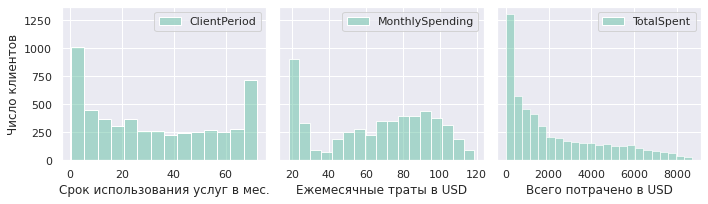

In [119]:
# Построим гистограммы числовых признаков
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 3), tight_layout=True, sharey=True)
sns.histplot(df[['ClientPeriod']], ax=ax1)
ax1.set_ylabel('Число клиентов')
ax1.set_xlabel('Срок использования услуг в мес.')

sns.histplot(df[['MonthlySpending']], ax=ax2)
ax2.set_ylabel('Число клиентов')
ax2.set_xlabel('Ежемесячные траты в USD')

sns.histplot(df[['TotalSpent']], ax=ax3)
ax3.set_ylabel('Число клиентов')
ax3.set_xlabel('Всего потрачено в USD')

plt.show()

/home/clou/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/clou/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/clou/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


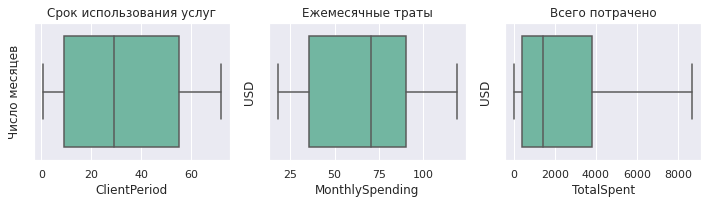

In [28]:
# Диаграммы размаха числовых признаков
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 3), tight_layout=True)
sns.boxplot(df['ClientPeriod'], ax=ax1)
ax1.set_title('Срок использования услуг')
ax1.set_ylabel('Число месяцев')

sns.boxplot(df['MonthlySpending'], ax=ax2)
ax2.set_title('Ежемесячные траты')
ax2.set_ylabel('USD')

sns.boxplot(df['TotalSpent'], ax=ax3)
ax3.set_title('Всего потрачено')
ax3.set_ylabel('USD')

plt.show()

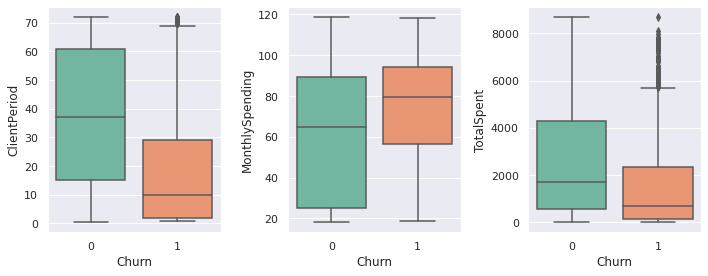

In [29]:
# Диаграммы размаха числовых признаков и целевой переменной
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4), tight_layout=True)
sns.boxplot(x='Churn', y='ClientPeriod', data=df, ax=ax1)
sns.boxplot(x='Churn', y='MonthlySpending', data=df, ax=ax2)
sns.boxplot(x='Churn', y='TotalSpent', data=df, ax=ax3);

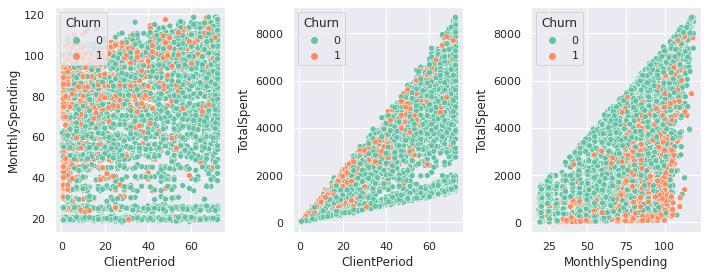

In [30]:
# Точечные диаграммы числовых признаков и целевой переменной
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4), tight_layout=True)
sns.scatterplot(x='ClientPeriod', y='MonthlySpending', hue='Churn', data=df, ax=ax1)
sns.scatterplot(x='ClientPeriod', y='TotalSpent', hue='Churn', data=df, ax=ax2)
sns.scatterplot(x='MonthlySpending', y='TotalSpent', hue='Churn', data=df, ax=ax3);

# Создание новых признаков

In [31]:
features_built = False
def feature_engineering(df):
    global features_built
    
    # Клиент владеет несколькими пакетами услуг
    def services_score(row):
        if 'Yes' in row or 'Fiber optic' in row or 'DSL' in row:
            return True
        else:
            return False

    services = [
        'HasPhoneService',
        'HasInternetService', 
        'HasOnlineTV',
        'HasMultiplePhoneNumbers',
    ]

    services_scored = df[services].applymap(services_score).sum(axis=1)
    df['HasMultipleServices'] = (services_scored >= 2)
    df['HasMultipleServices'] = df['HasMultipleServices'].astype('int64')

    # Клиент подписан на дополнительные услуги
    subscriptions = [
        'HasOnlineSecurityService',
        'HasOnlineBackup',
        'HasDeviceProtection', 
        'HasTechSupportAccess',
        'HasMovieSubscription'
    ]

    subs_scored = df[subscriptions].applymap(services_score).sum(axis=1)
    df['HasMultipleSubscriptions'] = (subs_scored >= 2)
    df['HasMultipleSubscriptions'] = df['HasMultipleSubscriptions'].astype('int64')

    # Клиент состоит в отношениях и имеет ребенка
    df['HasPartnerAndChild'] = (df['HasPartner'] == 'Yes') & (df['HasChild'] == 'Yes')
    df['HasPartnerAndChild'] = df['HasPartnerAndChild'].astype('int64')

    # Отношение ежемесячных платежей к общим тратам на услуги компании
    df['MonthlyToTotalRatio'] = df['MonthlySpending'] / df['TotalSpent']
    
    # Отношение периода к ежемесячным тратам
    df['PeriodToMonthlyRatio'] = df['ClientPeriod'] / df['MonthlySpending']
    
    # Обновляем списки названий столбцов
    new_num = ['MonthlyToTotalRatio', 'PeriodToMonthlyRatio']
    new_cat = ['HasPartnerAndChild', 'HasMultipleServices', 'HasMultipleSubscriptions']
    
    # Эти фичи будем добавлять и к test.csv, но их названия в списках не дублируем 
    if not features_built:
        global num_cols, cat_cols
        num_cols += new_num
        cat_cols += new_cat

        features_built = True
    return df

In [32]:
# Добавляем фичи к набору данных
df = feature_engineering(df)
df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,...,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn,HasMultipleServices,HasMultipleSubscriptions,HasPartnerAndChild,MonthlyToTotalRatio,PeriodToMonthlyRatio
0,55.0,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,...,No internet service,One year,No,Mailed check,0,0,0,1,0.018999,2.820513
1,72.0,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,...,No internet service,Two year,No,Credit card (automatic),0,1,0,0,0.013807,2.785300
2,1.0,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Electronic check,1,1,0,0,1.000000,0.013175
3,32.0,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,...,No,Month-to-month,No,Mailed check,0,1,0,0,0.030856,0.403531
4,60.0,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,...,Yes,Two year,No,Credit card (automatic),0,1,1,1,0.017053,0.520607


In [33]:
df.shape

(5268, 25)

# Предварительная обработка данных

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler

In [35]:
# Кодируем категориальные признаки
enc = OneHotEncoder(sparse='False')

In [36]:
enc.fit(df[cat_cols])

OneHotEncoder(sparse='False')

In [139]:
encoded = enc.transform(df[cat_cols]).toarray()
encoded = pd.DataFrame(encoded, columns=enc.get_feature_names()).reset_index(drop=True) # get_feature_names_out()
print(encoded.shape)
encoded.head()

(5268, 49)


,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check,x16_0,x16_1,x17_0,x17_1,x18_0,x18_1
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [140]:
df = df.reset_index().drop(columns=['index'])

In [42]:
print('Original df shape:', df.shape)
print('Encoded df shape:', encoded.shape)

Original df shape: (5268, 25)
Encoded df shape: (5268, 49)


In [43]:
df_encoded = pd.concat((df.drop(columns=cat_cols), encoded), axis=1)
print(df_encoded.shape)
df_encoded.head()

(5268, 55)


,ClientPeriod,MonthlySpending,TotalSpent,Churn,MonthlyToTotalRatio,PeriodToMonthlyRatio,x0_Female,x0_Male,x1_0,x1_1,...,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check,x16_0,x16_1,x17_0,x17_1,x18_0,x18_1
0,55.0,19.50,1026.35,0,0.018999,2.820513,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,72.0,25.85,1872.20,0,0.013807,2.785300,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,75.90,75.90,1,1.000000,0.013175,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,32.0,79.30,2570.00,0,0.030856,0.403531,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,60.0,115.25,6758.45,0,0.017053,0.520607,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [44]:
# Нормируем числовые признаки
scaler = RobustScaler()
feat_norm = scaler.fit_transform(df_encoded[num_cols])
feat_norm = pd.DataFrame(feat_norm, columns=df_encoded[num_cols].columns)
print(feat_norm.shape)
feat_norm.head()

(5268, 5)


,ClientPeriod,MonthlySpending,TotalSpent,MonthlyToTotalRatio,PeriodToMonthlyRatio
0,0.565217,-0.934648,-0.113056,-0.165633,3.740210
1,0.934783,-0.818161,0.135233,-0.220869,3.684326
2,-0.608696,0.099977,-0.392050,10.270653,-0.715115
3,0.065217,0.162348,0.340064,-0.039497,-0.095609
4,0.673913,0.821830,1.569534,-0.186342,0.090195


In [45]:
df_norm = pd.concat((df_encoded.drop(columns=num_cols), feat_norm), axis=1)

# удаляем, потому что он сильно кореллирует с другими признаками
df_norm = df_norm.drop(columns=['TotalSpent']) 
df_norm.head()

,Churn,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,...,x16_0,x16_1,x17_0,x17_1,x18_0,x18_1,ClientPeriod,MonthlySpending,MonthlyToTotalRatio,PeriodToMonthlyRatio
0,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.565217,-0.934648,-0.165633,3.740210
1,0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.934783,-0.818161,-0.220869,3.684326
2,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,-0.608696,0.099977,10.270653,-0.715115
3,0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.065217,0.162348,-0.039497,-0.095609
4,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.673913,0.821830,-0.186342,0.090195


# Baseline модель

In [46]:
X = df_norm.drop(columns=target_col)
y = df_norm[target_col]

In [47]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [48]:
model = LogisticRegressionCV(max_iter=250)
scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print(f'{scores.mean()} roc-auc, стандартное отклонение {scores.std()}.')

0.8488499899411807 roc-auc, стандартное отклонение 0.012975138619044315.


In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [51]:
results = []
names = []
model_scores = {'model': [], 'roc_auc_score': [], 'std': []}
models = [
    ('LR', LogisticRegressionCV(max_iter=250, refit=True, random_state=1)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=1)),
    ('RF', RandomForestClassifier(random_state=1)),
    ('SVR', SVC(gamma='auto',random_state=1)),
    ('GB', GradientBoostingClassifier(random_state=1)),
    #('LightGBM', LGBMClassifier(random_state=1)),
    ('Catboost', CatBoostClassifier(verbose=False))
]

for name, model in models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    model_scores['model'].append(name)
    model_scores['roc_auc_score'].append(cv_results.mean())
    model_scores['std'].append(cv_results.std())
    
    print(msg)

LR: 0.848528 (0.017890)
KNN: 0.781488 (0.018254)
CART: 0.653806 (0.021493)
RF: 0.820322 (0.017149)
SVR: 0.810104 (0.023842)
GB: 0.842070 (0.018322)
Catboost: 0.837600 (0.017917)


In [53]:
pd.DataFrame(model_scores).sort_values(by=['roc_auc_score'], ascending=False).reset_index(drop=True)

,model,roc_auc_score,std
0,LR,0.848528,0.017890
1,GB,0.842070,0.018322
2,Catboost,0.837600,0.017917
3,RF,0.820322,0.017149
4,SVR,0.810104,0.023842
5,KNN,0.781488,0.018254
6,CART,0.653806,0.021493


In [54]:
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegressionCV(max_iter=250, refit=True, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
print(conf_mat)

[[694 121]
 [ 92 147]]


In [55]:
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])

True Positive :  147
True Negative :  694
False Positive:  121
False Negative:  92


In [56]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       786
           1       0.62      0.55      0.58       268

    accuracy                           0.80      1054
   macro avg       0.73      0.72      0.72      1054
weighted avg       0.79      0.80      0.79      1054



# Модель

In [57]:
df_no_total = df.drop(columns=['TotalSpent'])
X = df.drop(columns=target_col)
y = df[target_col]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Настройка гиперпараметров

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Создание преобразователей, которыми будем 
# обрабатывать столбцы с разными типами данных
numeric_transformer = Pipeline(
    steps=[('scaler', RobustScaler())] # Robust должен быть менее чувствителен
)                                      # к выбросам в данных

categorical_transformer = Pipeline(
    steps=[
        ('ohe', OneHotEncoder()), # В описании задания был также LabelEncoder,
    ]                             # однако документация Sklearn не рекомендует
                                  # использовать его для фичей
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols),
    ]
)

boost_preprocessor = ColumnTransformer(  # Отдельный преобразователь для алгоритмов,
    transformers=[                       # основанных на деревьях
        ('cat', categorical_transformer, cat_cols),
    ]
)

In [60]:
from sklearn.metrics import roc_auc_score

In [61]:
# Создаем пайплайны интересующих нас моделей.
# Остановимся на двух лучших из Baseline решения, остальные как-нибудь потом...
pipe_lr = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("LR", LogisticRegression(max_iter=250))]
)

# pipe_gb = Pipeline(
#     steps=[
#         ("preprocessor", boost_preprocessor), 
#         ("GB", GradientBoostingClassifier(random_state=1))]
# )

pipe_cb = Pipeline(
    steps=[
        ("CB", CatBoostClassifier(random_state=1, cat_features=cat_cols, verbose=False))]
)

# pipe_lgbm = Pipeline(
#     steps=[
#         ("preprocessor", preprocessor), 
#         ("LGBM", LGBMClassifier(random_state=1))]
# )

# pipe_rf = Pipeline(
#     steps=[
#         ("preprocessor", preprocessor), 
#         ("RF", RandomForestClassifier(random_state=1))]
# )



In [62]:
# Создаем сетки гиперпараметров для каждой модели. 
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [0.01, 0.03, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]

lr_param_grid = [{
    'LR__penalty': ['l1', 'l2'],
    'LR__C': param_range_fl,
    'LR__solver': ['liblinear']}]

# gb_param_grid = [{
#     'GB__learning_rate': [0.1],
#     'GB__n_estimators': [100, 500],
#     'GB__max_depth': [3, 5],
# }]

cb_param_grid = [{
    'CB__learning_rate': learning_rates,
    'CB__depth': param_range[3:],
    'CB__l2_leaf_reg': param_range[::2]
}]

# lgbm_param_grid = [{
#     'LGBM__num_leaves': [15, 31, 63],
#     'LGBM__max_depth': [-1, 5, 10],
#     'LGBM__learning_rate': learning_rates,
#     'LGBM__n_estimators': n_estimators
# }]

# rf_param_grid = [{
#     'RF__min_samples_leaf': param_range,
#     'RF__max_depth': param_range,
#     'RF__min_samples_split': param_range[1:]
# }]

In [63]:
from sklearn.model_selection import GridSearchCV
scoring = 'roc_auc'
cv = 2
verbose = 10
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring=scoring,
        cv=cv, 
        verbose=verbose)

# gb_grid_search = GridSearchCV(estimator=pipe_gb,
#         param_grid=gb_param_grid,
#         scoring=scoring,
#         cv=cv,
#         verbose=verbose)

cb_grid_search = GridSearchCV(estimator=pipe_cb,
        param_grid=cb_param_grid,
        scoring=scoring,
        cv=cv,
        verbose=verbose)

# lgbm_grid_search = GridSearchCV(estimator=pipe_lgbm,
#         param_grid=lgbm_param_grid,
#         scoring=scoring,
#         cv=cv,
#         verbose=verbose)

# rf_grid_search = GridSearchCV(estimator=pipe_gb,
#         param_grid=rf_param_grid,
#         scoring=scoring,
#         cv=cv,
#         verbose=verbose)

In [64]:
# Дальше будет очень долгий скролл. Простите, я не буду это перезапускать.
grids = [lr_grid_search, cb_grid_search] 
# gb_grid_search, cb_grid_search, lgbm_grid_search, rf_grid_search]
for pipe in grids:
    pipe.fit(X_train,y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2; 1/6] START LR__C=0.01, LR__penalty=l1, LR__solver=liblinear............
[CV 1/2; 1/6] END LR__C=0.01, LR__penalty=l1, LR__solver=liblinear;, score=0.789 total time=   0.1s
[CV 2/2; 1/6] START LR__C=0.01, LR__penalty=l1, LR__solver=liblinear............
[CV 2/2; 1/6] END LR__C=0.01, LR__penalty=l1, LR__solver=liblinear;, score=0.797 total time=   0.1s
[CV 1/2; 2/6] START LR__C=0.01, LR__penalty=l2, LR__solver=liblinear............
[CV 1/2; 2/6] END LR__C=0.01, LR__penalty=l2, LR__solver=liblinear;, score=0.849 total time=   0.1s
[CV 2/2; 2/6] START LR__C=0.01, LR__penalty=l2, LR__solver=liblinear............
[CV 2/2; 2/6] END LR__C=0.01, LR__penalty=l2, LR__solver=liblinear;, score=0.848 total time=   0.1s
[CV 1/2; 3/6] START LR__C=0.03, LR__penalty=l1, LR__solver=liblinear............
[CV 1/2; 3/6] END LR__C=0.03, LR__penalty=l1, LR__solver=liblinear;, score=0.838 total time=   0.1s
[CV 2/2; 3/6] START LR__C=0.03, LR_

[CV 1/2; 17/27] END CB__depth=5, CB__l2_leaf_reg=5, CB__learning_rate=0.2;, score=0.822 total time=   8.0s
[CV 2/2; 17/27] START CB__depth=5, CB__l2_leaf_reg=5, CB__learning_rate=0.2.....
[CV 2/2; 17/27] END CB__depth=5, CB__l2_leaf_reg=5, CB__learning_rate=0.2;, score=0.826 total time=   8.0s
[CV 1/2; 18/27] START CB__depth=5, CB__l2_leaf_reg=5, CB__learning_rate=0.3.....
[CV 1/2; 18/27] END CB__depth=5, CB__l2_leaf_reg=5, CB__learning_rate=0.3;, score=0.822 total time=   8.0s
[CV 2/2; 18/27] START CB__depth=5, CB__l2_leaf_reg=5, CB__learning_rate=0.3.....
[CV 2/2; 18/27] END CB__depth=5, CB__l2_leaf_reg=5, CB__learning_rate=0.3;, score=0.823 total time=   7.9s
[CV 1/2; 19/27] START CB__depth=6, CB__l2_leaf_reg=1, CB__learning_rate=0.1.....
[CV 1/2; 19/27] END CB__depth=6, CB__l2_leaf_reg=1, CB__learning_rate=0.1;, score=0.830 total time=  10.1s
[CV 2/2; 19/27] START CB__depth=6, CB__l2_leaf_reg=1, CB__learning_rate=0.1.....
[CV 2/2; 19/27] END CB__depth=6, CB__l2_leaf_reg=1, CB__lear

In [65]:
# Смотрим на полученные комбинации гиперпараметров и скоринг
# grid_dict = {0: 'Logistic Regression', 1: 'Gradient Boosting', 
#              2: 'Catboost', 3: 'LightGBM', 
#              4: 'Random Forest'}

grid_dict = {0: 'Logistic Regression', 1: 'Catboost'}

for i, model in enumerate(grids):
    print(f'{grid_dict[i]} Test Roc-Auc: {model.score(X_test, y_test)}')
    print(f'{grid_dict[i]} Best Params: {model.best_params_}')

Logistic Regression Test Roc-Auc: 0.8352607193042422
Logistic Regression Best Params: {'LR__C': 0.1, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Catboost Test Roc-Auc: 0.8197110819946071
Catboost Best Params: {'CB__depth': 4, 'CB__l2_leaf_reg': 5, 'CB__learning_rate': 0.1}


In [100]:
pipe_lr_fin = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("LR", LogisticRegression(max_iter=250, 
                                  C=0.1,
                                  penalty='l2',
                                  solver='liblinear'))]
)

In [213]:
ft = X_train.columns

In [203]:
import random

In [242]:
l = np.array([])
for i in range(20):
    #random_list = random.sample(range(1, 23), k=1)
    random_list
    pipe_lr_fin.fit(X_train[ft[[1,2,3,4]][:]], y_train)
    l = pipe_lr_fin

ValueError: A given column is not a column of the dataframe

In [146]:
pipe_lr_fin.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [14, 4214]

In [142]:
roc_auc_score(y_train, pipe_lr_fin.predict_proba(X_train)[:,1])

0.8559611665398283

In [143]:
roc_auc_score(y_test, pipe_lr_fin.predict_proba(X_test)[:,1])

0.8352607193042422

In [104]:
# Обучаем лучшую модель с найденными гиперпараметрами
pipe_lr_fin.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent',
                                                   'MonthlyToTotalRatio',
                                                   'PeriodToMonthlyRatio']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                      

In [89]:
valid_df = pd.read_csv('../test.csv')
print(valid_df.shape)
valid_df.head()

(1761, 19)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [90]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [91]:
valid_df['IsSeniorCitizen'] = valid_df['IsSeniorCitizen'].astype('object')

In [92]:
# Очистка и приведение к числовому типу
valid_df['TotalSpent'] = valid_df['TotalSpent'].str.strip()
valid_df['TotalSpent'] = valid_df['TotalSpent'].replace('', np.nan)
valid_df['TotalSpent'] = valid_df['TotalSpent'].astype('float64')
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1759 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   object 
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [93]:
print(valid_df.isna().sum())
filt = (valid_df['TotalSpent'].isna() == True) 
valid_df[filt]

ClientPeriod                0
MonthlySpending             0
TotalSpent                  2
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
177,0,19.85,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
767,0,20.25,NaN,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [94]:
valid_df['ClientPeriod'].replace(0, 0.5, inplace=True)
valid_df['TotalSpent'].fillna(valid_df['MonthlySpending'], inplace=True)
print(valid_df.isna().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64


In [95]:
valid_df = feature_engineering(valid_df)
valid_df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,...,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,HasMultipleServices,HasMultipleSubscriptions,HasPartnerAndChild,MonthlyToTotalRatio,PeriodToMonthlyRatio
0,42.0,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,...,No,No,One year,No,Credit card (automatic),1,0,0,0.023504,0.748663
1,29.0,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,1,1,0,0.032788,0.294416
2,9.0,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,1,0,0,0.111338,0.118033
3,67.0,74.00,4868.40,Female,0,Yes,Yes,Yes,Yes,DSL,...,Yes,No,Two year,No,Credit card (automatic),1,1,1,0.015200,0.905405
4,71.0,20.10,1389.60,Female,0,Yes,Yes,Yes,No,No,...,No internet service,No internet service,Two year,No,Bank transfer (automatic),0,0,1,0.014465,3.532338


In [96]:
fin_probs = pipe_lr_fin.predict_proba(valid_df)
fin_probs.shape

(1761, 2)

In [97]:
preds = pd.DataFrame(fin_probs[:, 1], columns=['Churn'])
preds.index.names = ['Id']
preds.head()

,Churn
Id,
0,0.049819
1,0.680355
2,0.631765
3,0.011494
4,0.002903


In [98]:
preds.to_csv('submission.csv')

### После гридсерча скор упал на 0.00003. На степике лучший скор.⠀

Ниже -- остатки бейзлайн решения, можно игнорировать.

===============

In [ ]:
# # Кодирование категориальных признаков
# enc = OneHotEncoder(sparse=False)
# enc.fit(valid_df[cat_cols])

# encoded = enc.transform(valid_df[cat_cols])
# encoded = pd.DataFrame(encoded, columns=enc.get_feature_names_out()).reset_index(drop=True)
# print(encoded.shape)
# encoded.head()

In [ ]:
# # Нормируем числовые признаки
# # scaler = StandardScaler()
# scaler = RobustScaler()
# feat_norm = scaler.fit_transform(valid_df[num_cols])
# feat_norm = pd.DataFrame(feat_norm, columns=valid_df[num_cols].columns)
# feat_norm = feat_norm.drop(columns=['TotalSpent'])
# print(feat_norm.shape)
# feat_norm.head()

In [ ]:
# valid_df = pd.concat([encoded, feat_norm], axis=1)

In [ ]:
# valid_df

In [ ]:
# X = valid_df

In [ ]:
# probs = model.predict_proba(X)
# probs.shape

In [ ]:
# preds = pd.DataFrame(probs[:, 1], columns=['Churn'])
# preds.index.names = ['Id']
# preds.head()

In [ ]:
# preds.to_csv('submission.csv')